In [ ]:
# Set up the Yelp API Key
api_key = 'Mzl78atrOOw3LK8EzEfNB5vgPPwBWctLLUOY8qcigm9pENbcgynxaeP6I-Ur3ZvxsZhNixlOzfj7fGnD6mjWGInRNP12a6Mn7hFw2O-WwDVEGj6FQ_Re9gk2aRkAaHYx'

# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }


Make an API Request and Extract Data
Use the Yelp API to fetch data required, adjusting parameters as necessary.

In [ ]:
import requests
import pandas as pd

# Define the locations for our business (western canada)
locations = ['edmonton','calgary','vancouver','banff','kelowna']
# Define a list of categories to search through
categories = ['sightseeing','tourist attraction','landmarks','explore']
# Define empty list to store data from all locations
comb_data = []

# loop through the locations
for location in locations:
  # loop through the categories to optimize search results
  for category in categories:
    # Paginate to 4 pages to maximize data capture
    for offset in range(0,201,50):
      # Define the paramaters
      params = {
          'location' : location,
          'term' : category,
          'limit' : 50,           # max results per request
          'offset' : offset
      }
      # Get the response
      response = requests.get(endpoint_url, headers = headers, params = params)
      data = response.json()
      # Check to see if word 'businesses' in data as some will not contain it
      if 'businesses' in data:
        businesses = data['businesses']
      # Append to list
      comb_data.extend(businesses)


# Create data frame of the combined data
df_yelp_data = pd.DataFrame(comb_data)

# Display the first few rows of the DataFrame to inspect the data
df_yelp_data.head()


# This extracts a total of 2387 rows of data


id                                alias  \
0  T66wNL1-QdNOjN_YsNN26Q            accidental-beach-edmonton   
1  gayjHl5TinOfNGiaDtGYlQ           high-level-bridge-edmonton   
2  DS_Rd85_2nqi3XvPuXrN9A          magicbus-tours-ltd-edmonton   
3  iMB5f4Rjz2fRWIBG8FA8vA        100-street-funicular-edmonton   
4  gdiGukKQNsJTqThIvEyf6g  cooking-lake-aviation-sherwood-park   

                    name                                          image_url  \
0       Accidental Beach  https://s3-media3.fl.yelpcdn.com/bphoto/o-zt3Z...   
1      High Level Bridge  https://s3-media4.fl.yelpcdn.com/bphoto/AlTMjD...   
2     MagicBus Tours Ltd  https://s3-media2.fl.yelpcdn.com/bphoto/7v2h9Y...   
3   100 Street Funicular  https://s3-media3.fl.yelpcdn.com/bphoto/aMTSUV...   
4  Cooking Lake Aviation  https://s3-media2.fl.yelpcdn.com/bphoto/oIhqGb...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/accidental-beach-edmo...             5   
1      False  https://www.yelp.com/biz/high-level-bridge-edm...             8   
2      False  https://www.yelp.com/biz/magicbus-tours-ltd-ed...             2   
3      False  https://www.yelp.com/biz/100-street-funicular-...             9   
4      False  https://www.yelp.com/biz/cooking-lake-aviation...             1   

                                          categories  rating  \
0             [{'alias': 'parks', 'title': 'Parks'}]     4.0   
1             [{'alias': 'tours', 'title': 'Tours'}]     4.5   
2      [{'alias': 'bustours', 'title': 'Bus Tours'}]     5.0   
3  [{'alias': 'localflavor', 'title': 'Local Flav...     4.1   
4  [{'alias': 'flightinstruction', 'title': 'Flig...     5.0   

                                         coordinates transactions  \
0  {'latitude': 53.5381823, 'longitude': -113.469...           []   
1  {'latitude': 53.530976720115, 'longitude': -11...           []   
2  {'latitude': 53.568364, 'longitude': -113.525165}           []   
3    {'latitude': 53.54012, 'longitude': -113.48925}           []   
4  {'latitude': 53.42652156472432, 'longitude': -...           []   

                                            location         phone  \
0  {'address1': '98 Avenue NW', 'address2': '', '...  +17809445555   
1  {'address1': '', 'address2': '', 'address3': '...                 
2  {'address1': '11834 Kingsway Avenue', 'address...  +17804780429   
3  {'address1': '10065 100 Street NW', 'address2'...                 
4  {'address1': '69-51401 Range Road 221', 'addre...  +17809222802   

     display_phone      distance  \
0  +1 780-944-5555   2853.741301   
1                     261.140109   
2  +1 780-478-0429   4531.821718   
3                    1837.527935   
4  +1 780-922-2802  28883.841184   

                                      business_hours  \
0                                                 []   
1                                                 []   
2  [{'open': [{'is_overnight': False, 'start': '0...   
3                                                 []   
4  [{'open': [{'is_overnight': False, 'start': '0...   

                                          attributes price  
0  {'business_temp_closed': None, 'waitlist_reser...   NaN  
1  {'business_temp_closed': None, 'waitlist_reser...   NaN  
2  {'business_temp_closed': None, 'waitlist_reser...   NaN  
3  {'business_temp_closed': None, 'waitlist_reser...   NaN  
4  {'business_temp_closed': None, 'waitlist_reser...   NaN

In [ ]:
# Save the extracted data into a CSV file
df_yelp_data.to_csv('TOUR_WESTERN_CANADA_DATA.csv', index=False)

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
# Importing necessary libraries for PySpark
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark


In [ ]:
import pandas as pd
import ast

# Read the downloaded data file so we do not keep calling the API
df_yelp_data = pd.read_csv("TOUR_WESTERN_CANADA_DATA.csv")

In [ ]:
# Drop unnecessary columns
df_yelp_data.drop(columns=['url', 'image_url','is_closed','transactions','display_phone','distance','business_hours','alias'], inplace=True)

# Drop nan values from the categories and coord as we are needing these for our idea
nan_cat = df_yelp_data['categories'].astype(str).str.strip() == '[]'
nan_coord = df_yelp_data['coordinates'].astype(str).str.strip() == '[]'
#print(nan_coord.sum()) # this is 0 so we do not need to proceed further
# use a mask to remove the values (ie. mask = rows that are not included through the condition above)
df_yelp_data = df_yelp_data[~nan_cat]

In [ ]:
# Explode the 'categories' column in the DataFrame, creating a new row for each business hour entry - we are seperating the category tags of the business
# The ignore_index=True option resets the index in the resulting DataFrame
df_yelp_data_exploded = df_yelp_data.explode('categories', ignore_index=True)
df_yelp_data_exploded.head()




id                   name  review_count  \
0  T66wNL1-QdNOjN_YsNN26Q       Accidental Beach             5   
1  gayjHl5TinOfNGiaDtGYlQ      High Level Bridge             8   
2  DS_Rd85_2nqi3XvPuXrN9A     MagicBus Tours Ltd             2   
3  iMB5f4Rjz2fRWIBG8FA8vA   100 Street Funicular             9   
4  gdiGukKQNsJTqThIvEyf6g  Cooking Lake Aviation             1   

                                          categories  rating  \
0             [{'alias': 'parks', 'title': 'Parks'}]     4.0   
1             [{'alias': 'tours', 'title': 'Tours'}]     4.5   
2      [{'alias': 'bustours', 'title': 'Bus Tours'}]     5.0   
3  [{'alias': 'localflavor', 'title': 'Local Flav...     4.1   
4  [{'alias': 'flightinstruction', 'title': 'Flig...     5.0   

                                         coordinates  \
0  {'latitude': 53.5381823, 'longitude': -113.469...   
1  {'latitude': 53.530976720115, 'longitude': -11...   
2  {'latitude': 53.568364, 'longitude': -113.525165}   
3    {'latitude': 53.54012, 'longitude': -113.48925}   
4  {'latitude': 53.42652156472432, 'longitude': -...   

                                            location         phone  \
0  {'address1': '98 Avenue NW', 'address2': '', '...  1.780945e+10   
1  {'address1': '', 'address2': '', 'address3': '...           NaN   
2  {'address1': '11834 Kingsway Avenue', 'address...  1.780478e+10   
3  {'address1': '10065 100 Street NW', 'address2'...           NaN   
4  {'address1': '69-51401 Range Road 221', 'addre...  1.780922e+10   

                                          attributes price  
0  {'business_temp_closed': None, 'waitlist_reser...   NaN  
1  {'business_temp_closed': None, 'waitlist_reser...   NaN  
2  {'business_temp_closed': None, 'waitlist_reser...   NaN  
3  {'business_temp_closed': None, 'waitlist_reser...   NaN  
4  {'business_temp_closed': None, 'waitlist_reser...   NaN

In [ ]:
# Normalize the 'categories' column
categories_normalized = pd.json_normalize(df_yelp_data_exploded['categories'])

# Normalize the 'location' column
location_normalized = pd.json_normalize(df_yelp_data_exploded['location'])

# Normalize the coordinates as we will use this for geographic mapping
coord_normalized = pd.json_normalize(df_yelp_data_exploded['coordinates'])

# Combine the normalized DataFrames with the original DataFrame (excluding categories and location)
df_yelp_data_normalized = pd.concat(
    [df_yelp_data_exploded.drop(columns=['categories', 'location', 'coordinates']), categories_normalized, location_normalized,coord_normalized ],
    axis=1
)
df_yelp_data_normalized.head()

# We see there is an issue with the normalizaion
# We must debugg

id                   name  review_count  rating  \
0  T66wNL1-QdNOjN_YsNN26Q       Accidental Beach             5     4.0   
1  gayjHl5TinOfNGiaDtGYlQ      High Level Bridge             8     4.5   
2  DS_Rd85_2nqi3XvPuXrN9A     MagicBus Tours Ltd             2     5.0   
3  iMB5f4Rjz2fRWIBG8FA8vA   100 Street Funicular             9     4.1   
4  gdiGukKQNsJTqThIvEyf6g  Cooking Lake Aviation             1     5.0   

          phone                                         attributes price  
0  1.780945e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN  
1           NaN  {'business_temp_closed': None, 'waitlist_reser...   NaN  
2  1.780478e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN  
3           NaN  {'business_temp_closed': None, 'waitlist_reser...   NaN  
4  1.780922e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN

In [ ]:
# We can see this is not displaying any data - that must mean the data was not exploded
location_normalized.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [ ]:
# We can see this is not displaying any data - that must mean the data was not exploded
categories_normalized.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [ ]:
coord_normalized.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [ ]:
# Look into what's going on with the data
# Here we found out that the columns of location and cateegory were strings so our nomralization/explosion of lists into their respective dictionary wasn't working
df_yelp_data_exploded['location'].apply(type).value_counts()


location
<class 'str'>    2789
Name: count, dtype: int64

In [ ]:
df_yelp_data_exploded['coordinates'].apply(type).value_counts()

coordinates
<class 'str'>    2789
Name: count, dtype: int64

In [ ]:
# Start from the begingig but convert the columns of location and category into lists

# Read the downloaded data file so we do not keep calling the API
df_yelp_data = pd.read_csv("TOUR_WESTERN_CANADA_DATA.csv")

# Drop unnecessary columns
df_yelp_data.drop(columns=['url', 'image_url','is_closed','transactions','display_phone','distance','business_hours','alias'], inplace=True)

# Drop nan values from the categories as we are needing a category for our idea
nan_cat = df_yelp_data['categories'].astype(str).str.strip() == '[]'
# use a mask to remove the values (ie. mask = rows that are not included through the condition above)
df_yelp_data = df_yelp_data[~nan_cat]

# Change the category & location column into list as they are currently strings and we cannot normalize/explode the data correctly
# Use ast.literal_eval(x) to convert the whole string as is to a list not breaking the data as it does (ie. not split up)
df_yelp_data['categories'] = df_yelp_data['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)
df_yelp_data['location'] = df_yelp_data['location'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)
df_yelp_data['coordinates'] = df_yelp_data['coordinates'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)



# Explode the 'categories' column in the DataFrame, creating a new row for each business hour entry - we are seperating the category tags of the business
# The ignore_index=True option resets the index in the resulting DataFrame
df_yelp_data_exploded = df_yelp_data.explode('categories', ignore_index=True)
df_yelp_data_exploded.head()




id                   name  review_count  \
0  T66wNL1-QdNOjN_YsNN26Q       Accidental Beach             5   
1  gayjHl5TinOfNGiaDtGYlQ      High Level Bridge             8   
2  DS_Rd85_2nqi3XvPuXrN9A     MagicBus Tours Ltd             2   
3  iMB5f4Rjz2fRWIBG8FA8vA   100 Street Funicular             9   
4  gdiGukKQNsJTqThIvEyf6g  Cooking Lake Aviation             1   

                                          categories  rating  \
0               {'alias': 'parks', 'title': 'Parks'}     4.0   
1               {'alias': 'tours', 'title': 'Tours'}     4.5   
2        {'alias': 'bustours', 'title': 'Bus Tours'}     5.0   
3  {'alias': 'localflavor', 'title': 'Local Flavor'}     4.1   
4  {'alias': 'flightinstruction', 'title': 'Fligh...     5.0   

                                         coordinates  \
0  {'latitude': 53.5381823, 'longitude': -113.469...   
1  {'latitude': 53.530976720115, 'longitude': -11...   
2  {'latitude': 53.568364, 'longitude': -113.525165}   
3    {'latitude': 53.54012, 'longitude': -113.48925}   
4  {'latitude': 53.42652156472432, 'longitude': -...   

                                            location         phone  \
0  {'address1': '98 Avenue NW', 'address2': '', '...  1.780945e+10   
1  {'address1': '', 'address2': '', 'address3': '...           NaN   
2  {'address1': '11834 Kingsway Avenue', 'address...  1.780478e+10   
3  {'address1': '10065 100 Street NW', 'address2'...           NaN   
4  {'address1': '69-51401 Range Road 221', 'addre...  1.780922e+10   

                                          attributes price  
0  {'business_temp_closed': None, 'waitlist_reser...   NaN  
1  {'business_temp_closed': None, 'waitlist_reser...   NaN  
2  {'business_temp_closed': None, 'waitlist_reser...   NaN  
3  {'business_temp_closed': None, 'waitlist_reser...   NaN  
4  {'business_temp_closed': None, 'waitlist_reser...   NaN

In [ ]:
# Look at the types
df_yelp_data_exploded['location'].apply(type).value_counts()

location
<class 'dict'>    4004
Name: count, dtype: int64

In [ ]:
df_yelp_data_exploded['categories'].apply(type).value_counts()

categories
<class 'dict'>    4004
Name: count, dtype: int64

In [ ]:
# Perform the rest of the normalizaiton now that we have debugged the explosion issue
# Normalize the 'categories', 'location', and 'coordinates' column
categories_normalized = pd.json_normalize(df_yelp_data_exploded['categories'])
location_normalized = pd.json_normalize(df_yelp_data_exploded['location'])
coordinates_normalized = pd.json_normalize(df_yelp_data_exploded['coordinates'])



# Combine the normalized DataFrames with the original DataFrame (excluding categories and location)
df_yelp_data_normalized = pd.concat(
    [df_yelp_data_exploded.drop(columns=['categories', 'location','coordinates']), categories_normalized, location_normalized,coordinates_normalized],
    axis=1
)
df_yelp_data_normalized.head()

id                   name  review_count  rating  \
0  T66wNL1-QdNOjN_YsNN26Q       Accidental Beach             5     4.0   
1  gayjHl5TinOfNGiaDtGYlQ      High Level Bridge             8     4.5   
2  DS_Rd85_2nqi3XvPuXrN9A     MagicBus Tours Ltd             2     5.0   
3  iMB5f4Rjz2fRWIBG8FA8vA   100 Street Funicular             9     4.1   
4  gdiGukKQNsJTqThIvEyf6g  Cooking Lake Aviation             1     5.0   

          phone                                         attributes price  \
0  1.780945e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN   
1           NaN  {'business_temp_closed': None, 'waitlist_reser...   NaN   
2  1.780478e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN   
3           NaN  {'business_temp_closed': None, 'waitlist_reser...   NaN   
4  1.780922e+10  {'business_temp_closed': None, 'waitlist_reser...   NaN   

               alias               title                 address1   address2  \
0              parks               Parks             98 Avenue NW              
1              tours               Tours                                       
2           bustours           Bus Tours    11834 Kingsway Avenue  Suite 902   
3        localflavor        Local Flavor      10065 100 Street NW              
4  flightinstruction  Flight Instruction  69-51401 Range Road 221              

  address3           city zip_code country state  \
0     None       Edmonton  T6C 2C5      CA    AB   
1                Edmonton               CA    AB   
2                Edmonton  T5G 3J5      CA    AB   
3     None       Edmonton  T5J 0N6      CA    AB   
4           Sherwood Park  T8E 1H1      CA    AB   

                                     display_address   latitude   longitude  
0       [98 Avenue NW, Edmonton, AB T6C 2C5, Canada]  53.538182 -113.469242  
1                             [Edmonton, AB, Canada]  53.530977 -113.510362  
2  [11834 Kingsway Avenue, Suite 902, Edmonton, A...  53.568364 -113.525165  
3  [10065 100 Street NW, Edmonton, AB T5J 0N6, Ca...  53.540120 -113.489250  
4  [69-51401 Range Road 221, Sherwood Park, AB T8...  53.426522 -113.108087

In [ ]:
# Drop duplicates of the names
df_yelp_data_normalized.drop_duplicates(subset=['name','title'],inplace=True)

In [ ]:
# Explore data categories
df_yelp_data_normalized["title"].unique().tolist()

['Parks',
 'Tours',
 'Bus Tours',
 'Local Flavor',
 'Flight Instruction',
 'Art Galleries',
 'Framing',
 'Landmarks & Historical Buildings',
 'Botanical Gardens',
 'Insurance',
 'Travel Services',
 'Registration Services',
 'Bike Rentals',
 'Museums',
 'Reiki',
 'Supernatural Readings',
 'Public Services & Government',
 'Venues & Event Spaces',
 'Shared Office Spaces',
 'Skating Rinks',
 'Lakes',
 'Public Art',
 'Travel Agents',
 'Boating',
 'Hotels',
 'Libraries',
 'Cinema',
 'Music Venues',
 'Bars',
 'Stadiums & Arenas',
 'Jazz & Blues',
 'Casinos',
 'Wedding Planning',
 'Party & Event Planning',
 'Hostels',
 'Performing Arts',
 'Festivals',
 'DJs',
 'Photo Booth Rentals',
 'Professional Sports Teams',
 'Dog Parks',
 'Community Centers',
 'Arts & Entertainment',
 'Transportation',
 'Limos',
 'Airport Shuttles',
 'Legal Services',
 'Passport & Visa Services',
 'Public Transportation',
 'Taxis',
 'Campgrounds',
 'Private Jet Charter',
 'Aerial Tours',
 'Car Rental',
 'Truck Rental',
 '

In [ ]:
len(df_yelp_data_normalized)

2420

In [ ]:
# Drop categories that aren't touristy / sightseeing / usual travel places based off the above list
drop = [
    'Insurance', 'Travel Services', 'Registration Services', 'Shared Office Spaces', 'Travel Agents',
    'Wedding Planning', 'Party & Event Planning', 'Airport Shuttles', 'Transportation', 'Legal Services',
    'Passport & Visa Services', 'Private Jet Charter', 'Public Transportation', 'Taxis', 'Car Rental',
    'Truck Rental', 'Airlines', 'Party Equipment Rentals', 'Child Care & Day Care', 'RV Repair',
    'Machine & Tool Rental', 'Preschools', 'Vocational & Technical School', 'Montessori Schools',
    'Appraisal Services', 'Jewelry Repair', 'Summer Camps', 'Home Inspectors', 'Environmental Testing',
    'Used Car Dealers', 'Musical Instruments & Teachers', 'Grilling Equipment', 'Caterers',
    'Employment Agencies', 'Pest Control', 'Dance Studios', 'Buses', 'Bike Repair/Maintenance',
    'Appliances & Repair', 'Appliances', 'Dance Schools', 'Middle Schools & High Schools', 'Data Recovery',
    'Colleges & Universities', "Men's Clothing", 'Accessories', 'Sports Wear', 'Hockey Equipment',
    'Real Estate Agents', 'Real Estate Services', 'Commercial Real Estate', 'Matchmakers', 'Photographers',
    'Airports', 'Music Production Services', 'Aviation Services', 'Town Car Service', 'Videographers',
    'Music & DVDs', 'Embassy', 'Video/Film Production', 'Commissioned Artists', 'Barbeque', 'Home Decor',
    'Swimming Lessons/Schools', 'Specialty Schools', 'Printing Services', 'Web Design', 'Graphic Design',
    'Water Purification Services', 'Water Stores', 'Water Delivery', 'Motorcycle Dealers', 'Motorcycle Repair',
    'Car Dealers', 'Auto Parts & Supplies', 'Watches', 'Watch Repair', 'Mobile Phone Repair',
    'Counseling & Mental Health', "Children's Clothing", 'Nanny Services', 'Snow Removal',
    'Event Photography', 'Parking', 'Carpet Cleaning', 'Grout Services', 'Towing', 'Roadside Assistance',
    'Electronics Repair', 'Mobile Phone Accessories', 'Heating & Air Conditioning/HVAC', 'Air Duct Cleaning',
    'Septic Services', 'General Contractors', 'Vacation Rental Agents', 'Couriers & Delivery Services',
    'IT Services & Computer Repair', 'Financial Advising', 'Business Consulting', 'Hazardous Waste Disposal',
    'Environmental Abatement', 'Movers', 'Self Storage', 'Packing Services', 'Fitness & Instruction',
    'Motorcycle Parts & Supplies', 'Challenge Courses', 'Gas Stations', 'Computers',
    'Event Planning & Services', 'Driving Schools', 'Office Cleaning', 'Window Washing', 'Clowns',
    'Party Characters', 'Auto Repair', 'Funeral Services & Cemeteries', 'Engraving', 'Trophy Shops',
    'Signmaking', 'Private Investigation', 'Security Systems', 'Baby Gear & Furniture', 'Notaries',
    'Junk Removal & Hauling', 'Excavation Services', 'Cideries', 'Life Coach', 'Kitchen & Bath',
    'Knife Sharpening', 'Sewing & Alterations', 'Limos', 'Grocery','Community Centers','Community Service/Non-Profit','Hotels'

]

# Step 2: Drop rows where 'title' is in the list
df_yelp_data_normalized = df_yelp_data_normalized[~df_yelp_data_normalized['title'].isin(drop)]
print(len(df_yelp_data_normalized))


1724


In [ ]:
# Initialize Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FinalProject").getOrCreate()


In [ ]:
# Create a Spark DataFrame from the cleaned Pandas DataFrame
yelp_spark_df = spark.createDataFrame(df_yelp_data_normalized)

# Preview the Spark DataFrame
yelp_spark_df.show(5)

+--------------------+--------------------+------------+------+---------------+--------------------+-----+-----------------+------------------+--------------------+---------+--------+-------------+--------+-------+-----+--------------------+-----------------+-------------------+
|                  id|                name|review_count|rating|          phone|          attributes|price|            alias|             title|            address1| address2|address3|         city|zip_code|country|state|     display_address|         latitude|          longitude|
+--------------------+--------------------+------------+------+---------------+--------------------+-----+-----------------+------------------+--------------------+---------+--------+-------------+--------+-------+-----+--------------------+-----------------+-------------------+
|T66wNL1-QdNOjN_Ys...|    Accidental Beach|           5|   4.0|1.7809445555E10|{'business_temp_c...|  NaN|            parks|             Parks|        98 Avenue

In [ ]:
# Register DataFrame as a temporary SQL view
yelp_spark_df.createOrReplaceTempView("yelp_businesses")


In [ ]:
# QUERY 1: Top tours across western Canada - having prices is not important as there is a lot of missing data here
top_tours = spark.sql("""
SELECT name, city, rating, review_count
FROM yelp_businesses
WHERE title = 'Tours'
ORDER BY rating DESC, review_count DESC
LIMIT 10
""")
print("Top 10 tours across Western Canada")
top_tours.show()


# QUERY 2: Top Attractions in Kelowna
# The data will have some duplicates of the name marked across differnt categories - we use paritition to select the highest ranking, reviewed duplicate row
top_tours_kelowna = spark.sql("""
SELECT DISTINCT name, city, rating, review_count,title as category
FROM (
  SELECT *,
  ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
  FROM yelp_businesses
  WHERE city = 'Kelowna'
)
WHERE row_rank = 1
ORDER BY rating DESC, review_count DESC
LIMIT 10
""")
print("Top 10 attractions in Kelowna, BC")
top_tours_kelowna.show()


# QUERY 3
# Top rated & reviewed category per city - we are dealing with duplicate names but different categories through selecting the category for that name with the highest reveiws and ratings
pop_title = spark.sql("""
SELECT state, title AS category, count_businesses
FROM (
  SELECT state, title, COUNT(*) AS count_businesses,
  RANK() OVER (PARTITION BY state ORDER BY COUNT(*) DESC) AS rank
  FROM (
    SELECT name, state, title, rating, review_count,
    ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC) AS row_rank
    FROM yelp_businesses
  )
  WHERE row_rank = 1
  GROUP BY state, title
)
WHERE rank = 1
ORDER BY state
""")
print("Top categories of exploration across Western Canada:")
pop_title.show(10)



# Query 4: Count the number of businesses by price range - ensure we are not counting duplicate businesses
price_range_counts = spark.sql("""
SELECT price, COUNT(*) as num_businesses
FROM (
  SELECT name, price,
  ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
  FROM yelp_businesses
)
WHERE row_rank = 1
GROUP BY price
ORDER BY num_businesses DESC
""")
print("Price ranges of landmarks to explore across Western Canada:")
price_range_counts.show()


# QUERY 5:Types of attractions in Banff - we are trying to see businesses over all categories so duplicates are ok here
banff_attractions = spark.sql("""
SELECT title AS category, COUNT(*) as count_businesses
FROM yelp_businesses
WHERE city = 'Banff'
GROUP BY title
ORDER BY count_businesses DESC
""")
print("Types of attractions available in Banff:")
banff_attractions.show()



# QUERY 6: Top 10 Affordable Attractions Across Western Canada
affordable_attractions = spark.sql("""
SELECT name, city, rating, review_count, price, title AS category
FROM (
  SELECT *,
  ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) as row_rank
  FROM yelp_businesses
  WHERE price = '$'
)
WHERE row_rank = 1
ORDER BY rating DESC, review_count DESC
LIMIT 10
""")
print("Top 10 affordable ($) attractions across Western Canada:")
affordable_attractions.show()



# QUERY 7: Top Rated & Reviewed Places Per Province - ensure no duplicate businesses
top_places_province = spark.sql("""
SELECT state, name, rating, review_count
FROM (
    SELECT state, name, rating, review_count,
           RANK() OVER (PARTITION BY state ORDER BY rating DESC, review_count DESC) AS rank
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
        FROM yelp_businesses
    )
    WHERE row_rank = 1
)
WHERE rank = 1
ORDER BY state
""")

print("Top rated & reviewed places per province:")
top_places_province.show()



# QUERY 8: Top 5 Cities With Most Attractions
top_cities = spark.sql("""
SELECT city, COUNT(*) AS count_businesses
FROM (
    SELECT name, city,
           ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
    FROM yelp_businesses
)
WHERE row_rank = 1
GROUP BY city
ORDER BY count_businesses DESC
LIMIT 5
""")
print("Top 5 cities with most attractions in Western Canada:")
top_cities.show()



# QUERY 9: Average Rating Per Category for categories with more than 10 businesses
avg_rating_category = spark.sql("""
SELECT title AS category,
       ROUND(AVG(rating), 2) AS avg_rating,
       COUNT(*) AS count_businesses
FROM yelp_businesses
GROUP BY title
HAVING COUNT(*) > 10
ORDER BY avg_rating DESC
""")
print("Average rating per category for cateogories with more than 10 businesses:")
avg_rating_category.show()


# Query 10 : Top cultural / arts sights
top_culture_per_city = spark.sql("""
SELECT city, name, title AS category, rating, review_count
FROM (
    SELECT city, name, title, rating, review_count,
           RANK() OVER (PARTITION BY city ORDER BY review_count DESC, rating DESC) AS rank
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
        FROM yelp_businesses
        WHERE title IN (
            'Museums',
            'Art Galleries',
            'Landmarks & Historical Buildings',
            'Public Art',
            'Opera & Ballet',
            'Art Museums'
        )
    )
    WHERE row_rank = 1
)
WHERE rank <= 5
ORDER BY city, rank
""")

print("Top 5 most reviewed museams / cultural centres / art galleries per city in Western Canada:")
top_culture_per_city.show(50)






Top 10 tours across Western Canada
+--------------------+-------------+------+------------+
|                name|         city|rating|review_count|
+--------------------+-------------+------+------------+
|   Hansen Distillery|     Edmonton|   5.0|           8|
|      Detours Travel|    Vancouver|   5.0|           6|
|Bestway Tours & S...|      Burnaby|   5.0|           6|
|Company of Advent...|      Calgary|   5.0|           5|
|         Alset Tours|North Saanich|   5.0|           5|
|         Glacier Air|  Brackendale|   5.0|           3|
|Moose Travel Network|    Vancouver|   5.0|           3|
|Mountain Madness ...|     Edmonton|   5.0|           2|
|        Signet Tours|      Burnaby|   5.0|           2|
|ABest Transport a...|      Calgary|   5.0|           2|
+--------------------+-------------+------+------------+

Top 10 attractions in Kelowna, BC
+--------------------+-------+------+------------+--------------------+
|                name|   city|rating|review_count|          

In [ ]:
import folium
import time
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px


# Query 1 : Visualization of the top tours across Wesetern Canada
top_tours = spark.sql("""
SELECT name, city, rating, review_count, longitude, latitude, price
FROM yelp_businesses
WHERE title = 'Tours'
ORDER BY rating DESC, review_count DESC
LIMIT 50
""")
# Create query reults to df
top_tours_df = top_tours.toPandas()

# Create Folium map
# Initialize a Folium map centered on Western Canada
map_ = folium.Map(location=[53.5, -115], zoom_start=5)


# Loop through each tour and add to map
for _, row in top_tours_df.iterrows():
    business_name = row['name']
    city = row['city']
    rating = row['rating']
    review_count = row['review_count']
    lat = row['latitude']
    lon = row['longitude']
    price = row['price']

    # Prepare popup content
    popup_content = f"""
    <b>{business_name}</b><br>
    City: {city}<br>
    Rating: {rating}<br>
    Reviews: {review_count}
    Price : {price}
    """

    # Add marker to map
    folium.Marker(
        location=(lat, lon),
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color="darkblue", icon="star")
    ).add_to(map_)

    time.sleep(1)

# Show the map
map_



In [ ]:
# All attractions / businesses/ sights map
all_attractions = spark.sql("""
SELECT *
FROM yelp_businesses
WHERE latitude IS NOT NULL AND longitude IS NOT NULL
""")
# Turn to df - drop nan values in case query did not catch all nans
all_attractions_df = all_attractions.toPandas().dropna(subset=['latitude', 'longitude'])


# Create Folium map
# Initialize a Folium map centered on Western Canada
map_ = folium.Map(location=[53.5, -115], zoom_start=5)


# Loop through each tour and add to map
for _, row in all_attractions_df.iterrows():
    business_name = row['name']
    city = row['city']
    rating = row['rating']
    review_count = row['review_count']
    lat = row['latitude']
    lon = row['longitude']
    price = row['price']

    # Prepare popup content
    popup_content = f"""
    <b>{business_name}</b><br>
    City: {city}<br>
    Rating: {rating}<br>
    Reviews: {review_count}
    Price : {price}
    """

    # Add marker to map
    folium.Marker(
        location=(lat, lon),
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color="darkblue", icon="star")
    ).add_to(map_)

    #time.sleep(1)

# Show the map
map_


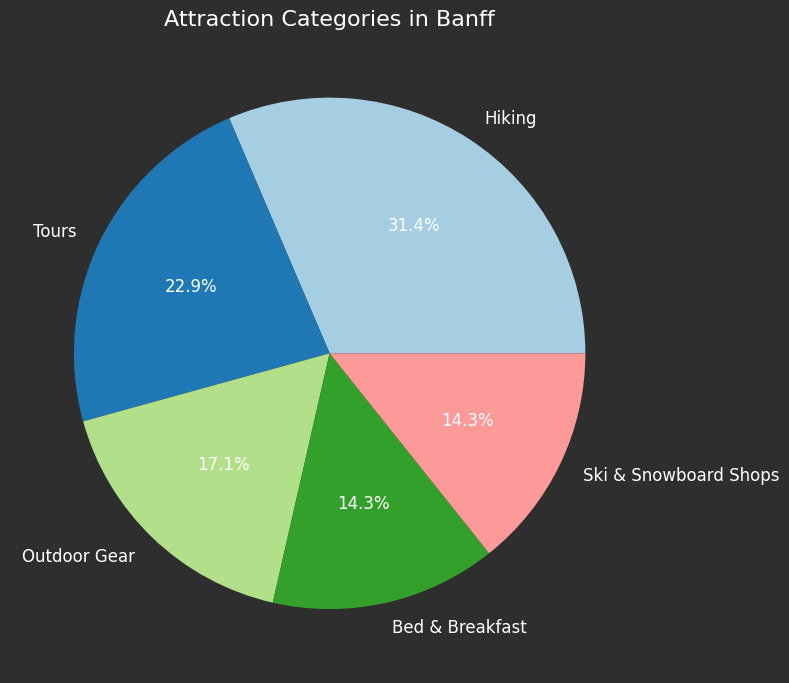

In [ ]:
# Query 5: Pie Chart - Attractions Category Distribution in Banff
banff_attractions = spark.sql("""
SELECT title AS category, COUNT(*) as count_businesses
FROM yelp_businesses
WHERE city = 'Banff'
GROUP BY title
ORDER BY count_businesses DESC
""")
banff_df = banff_attractions.toPandas()
banff_df_top5 = banff_df.head(5)

# Define a color shcheme from matplotlibs color schemes
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
cmap = plt.get_cmap('Paired')
# Create a list of colors
custom_colors = cmap(range(len(banff_df_top5)))

# Set up dark grey background
background_color = '#2E2E2E'
# Create the empty plot
fig, ax = plt.subplots(figsize=(8, 8), facecolor=background_color)
ax.set_facecolor(background_color)

# Create the pie chart
ax.pie(
    banff_df_top5['count_businesses'],
    labels=banff_df_top5['category'],
    autopct='%1.1f%%',  # decimal place
    textprops={'fontsize': 12, 'color': 'white'},
    colors=custom_colors[:len(banff_df_top5)]
)

# Title
ax.set_title('Attraction Categories in Banff', fontsize=16, color='white')

plt.tight_layout()
plt.show()


<ipython-input-125-d5489c1b59ff>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




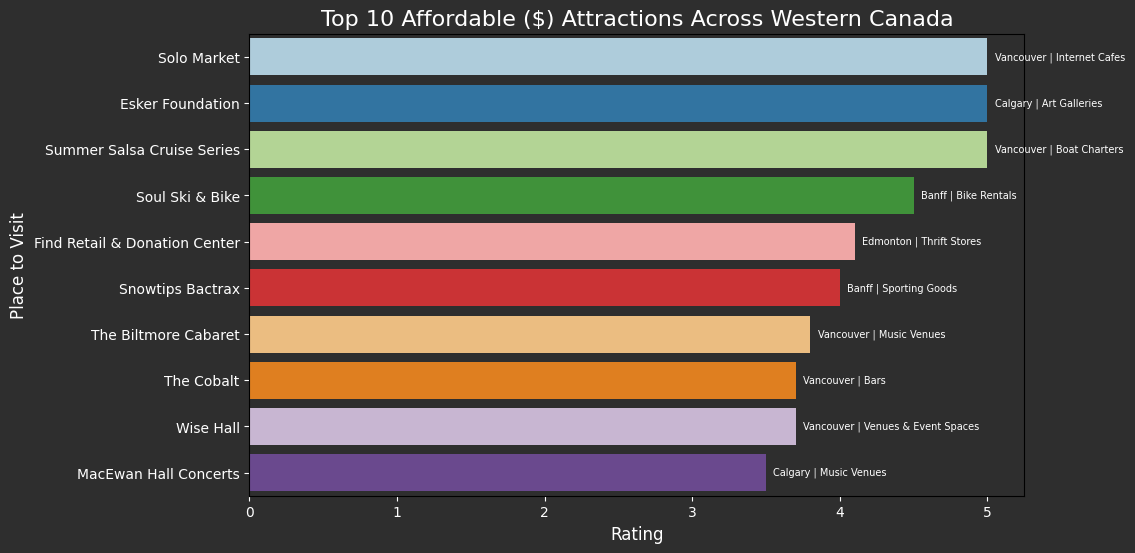

In [ ]:
# Query 6 : Horizontal Bar Chart - Top 10 Affordable ($) Attractions
affordable_attractions = spark.sql("""
SELECT name, city, rating, review_count, price, title AS category
FROM (
  SELECT *,
  ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) as row_rank
  FROM yelp_businesses
  WHERE price = '$' AND title IS NOT NULL
)
WHERE row_rank = 1
ORDER BY rating DESC, review_count DESC
LIMIT 10
""")

# Results to df
affordable_df = affordable_attractions.toPandas()

# set the background color to grey
background_color = '#2E2E2E'
# Create empty plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor=background_color)
ax.set_facecolor(background_color)

# Define color palette
cmap = plt.get_cmap('Paired')
custom_colors = list(cmap(range(len(affordable_df))))

# Create horizontal bar chart
bar_container = sea.barplot(
                    x='rating',
                    y='name',
                    data=affordable_df,
                    orient='h',
                    palette=custom_colors,
                    ax=ax,
                    hue = None)

# Titles, and axis names
ax.set_title('Top 10 Affordable ($) Attractions Across Western Canada', fontsize=16, color='white')
ax.set_xlabel('Rating', fontsize=12, color='white')
ax.set_ylabel('Place to Visit', fontsize=12, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Combine city and category into a single label string
labels = [f"{city} | {cat}" for city, cat in zip(affordable_df['city'], affordable_df['category'])]

# Loop through bars and apply label
for patch, label in zip(ax.patches, labels):
  # Get length of bar
  width = patch.get_width()
  # Compute verstical center of bar so label is applied
  y = patch.get_y() + patch.get_height() / 2
  # Place label to right of the bar + 0.5 - and vertically center the text
  ax.text(width + 0.05, y, label, va='center', color='white', fontsize=7)

# Show the plot
plt.show()

<ipython-input-126-e38b01a87e39>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




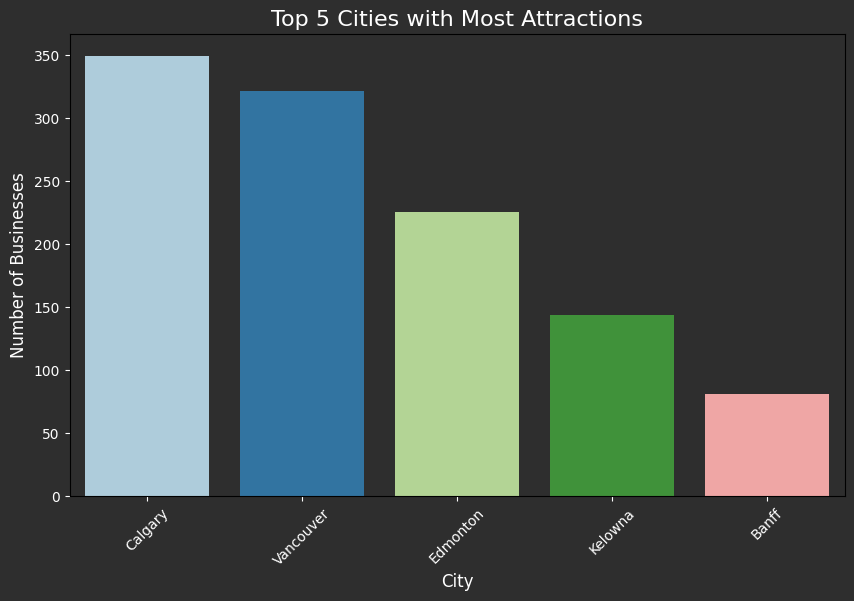

In [ ]:
# Query 8: Vertical Bar Chart - Top 5 Cities with Most Attractions ---
top_cities = spark.sql("""
SELECT city, COUNT(*) AS count_businesses
FROM (
    SELECT name, city,
           ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
    FROM yelp_businesses
)
WHERE row_rank = 1
GROUP BY city
ORDER BY count_businesses DESC
LIMIT 5
""")
# Turn to df
top_cities_df = top_cities.toPandas()

# Create figure and axis with dark background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#2E2E2E')
ax.set_facecolor('#2E2E2E')

# Define custom colors from a colormap
cmap = plt.get_cmap('Paired')
custom_colors = list(cmap(range(len(top_cities_df))))

# Create barplot
sea.barplot(
    x='city',
    y='count_businesses',
    data=top_cities_df,
    palette=custom_colors,
    ax=ax
)

# Title and labels with white text
ax.set_title('Top 5 Cities with Most Attractions', fontsize=16, color='white')
ax.set_xlabel('City', fontsize=12, color='white')
ax.set_ylabel('Number of Businesses', fontsize=12, color='white')

# Tick labels in white
ax.tick_params(axis='x', colors='white', labelrotation=45)
ax.tick_params(axis='y', colors='white')

# Show graph
plt.show()


In [ ]:
# Query 10 : Top cultural attractions by their rating and review count by location
top_culture_per_city = spark.sql("""
SELECT city, name, title AS category, rating, review_count
FROM (
    SELECT city, name, title, rating, review_count,
           RANK() OVER (PARTITION BY city ORDER BY review_count DESC, rating DESC) AS rank
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (PARTITION BY name ORDER BY rating DESC, review_count DESC) AS row_rank
        FROM yelp_businesses
        WHERE title IN (
            'Museums',
            'Art Galleries',
            'Landmarks & Historical Buildings',
            'Public Art',
            'Opera & Ballet',
            'Art Museums'
        )
        AND city IN(
          'Kelowna',
          'Edmonton',
          'Calgary',
          'Vancouver',
          'Banff',
          'Kelowna'
        )
    )
    WHERE row_rank = 1
)
WHERE rank <= 5
ORDER BY city, rank
""")
# Create scatter plot with rating as the color
fig = px.scatter(
    top_culture_per_city,
    x='city',
    y='review_count',
    size='rating',
    color='rating',
    hover_name='name',
    size_max=40,
    color_continuous_scale='Viridis',
    title='Top Cultural Attractions by City (Bubble Size = Rating)'
)

# Adjust the background colors and fonts, add titles
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Review Count',
    plot_bgcolor='#2E2E2E',
    paper_bgcolor='#2E2E2E',
    font_color='white',
    title_font_size=30
)

# Used to display plotly graphs
fig.show()

Conclusion & Next Steps

### Conclusion
Summarize the key findings from your analysis, explaining how they support your business idea. For example:

- **Top Rated Businesses**: We identified the highest-rated businesses, which are ideal candidates for recommendation.
- **Category Insights**: Our analysis showed which categories are most popular in the Yelp dataset.

### Future Steps
- **Expand Data Collection**: Collect more data points (e.g., reviews, more businesses).
- **Improve Recommendations**: Use the data to create a recommendation algorithm.



The analysis proved very intersesting. For one businesses tagged on yelp under the categories of 'sightseeing','tourist attraction','landmarks', and'explore' provide results for businesses that offer local services such as repair shops, schools, and other businesses you wouldn't really expect to be under the travel section. Although the counts of businesses marked under these catgories were small it was important to not include them in our app.

The main categories of exploration such a tours and local sights to see were in plenty with our data set. We identified insights such as:
- the top businesses by category (ex. top cultural businesses in western canada
- the most afforadable businesses in Western Canada (Solo Market in Vancover)
- top categories for sights to see in Banff (hiking was the highest ranking)
- top tours across Western Canada by ranking and count of reviews (Hansen Distillery Edmonton)
- top attractions in Kelowna (Experience wine tours)
- top categories of exploration by province (Landmarks & History)


This data proves valulable as it can allow a traveller to view the insights and determine where to visit based off of of key features such as type of activitiy or prices.

For future steps we can build the features even more and double down on creating a roadmap for the traveller from place to place across Western Canada. This can take the form of what activities they wish to do (ie. visit museams and other cultural sights, or focus on music related businesses and tours). Our data currently is still broad so we could make improvements on filtering further based on groupings of the categories avaialbe (ex. grouping camping/ hiking/outdoor activites related businesses together).